In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans





%matplotlib inline

In [7]:
img = cv2.imread('batman.png')

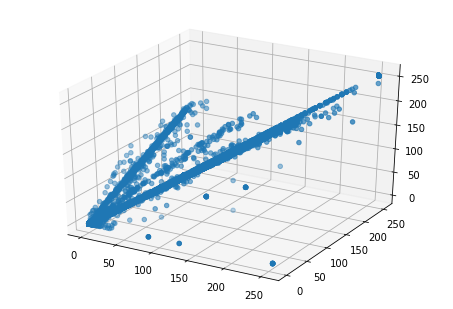

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(img[:, :,0], img[:, :,1], img[:,:, 2])


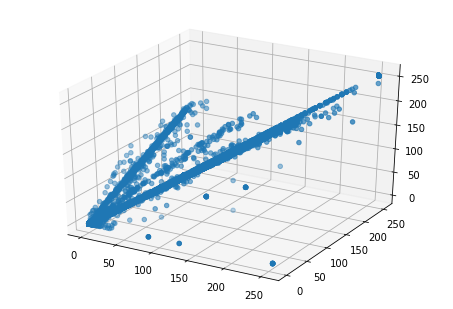

In [11]:
img1 = cv2.imread('batman.png')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(img1[:, :,0], img1[:, :,1], img1[:,:, 2])

In [12]:

img1 = cv2.imread('batman.png')

r = img1[:,:,0].reshape(img1.shape[0]*img1.shape[1],1)
g = img1[:,:,1].reshape(img1.shape[0]*img1.shape[1],1)
b = img1[:,:,2].reshape(img1.shape[0]*img1.shape[1],1)

img_arr = np.array([r,g,b]).reshape(len(r),3)

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(img_arr)
# Predicting the clusters
labels = kmeans.predict(img_arr)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [14]:
d = np.array(C,dtype=np.uint8)

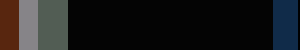

In [15]:
pallete = np.zeros((50,300,3),dtype=np.uint8)


c = {l:[] for l in np.unique(kmeans.labels_)}

[c[l].append(index) for index,l in enumerate(kmeans.labels_)]

bands = {l:len(c[l])/len(kmeans.labels_) for l in c}


start = 0

for b in bands:
    p = start+int(300*bands[b])
    pallete[:,start:p,:] = d[b]
    start = p

Image.fromarray(pallete)